In [1]:
import requests as req
import random

api = 'https://kawal-c1.appspot.com/api/c/' # alamat API

def getRandomTPSElectionData(id='0'):
    try:
        addr = api + str(id)
        rslt = req.get(addr)
        if rslt.status_code == req.codes.ok:
        data = rslt.json()
        if data['depth'] < 4:
            children = list(data['children'])
            selected_child = random.choice(children)
            next_id = selected_child[0]
            if next_id == -99: # exclude oversea polling stations for the sake of shorter LOC
                return False  
            return getRandomTPSElectionData(next_id)
        else:
            tps_list = list(data['data'])
            selected_tps = random.choice(tps_list)
            no_tps = selected_tps[0]
            summary = data['data'][no_tps]['sum']
            tpsid = '-'.join(data['parentNames'])+ data['name']+'- TPS NO '+no_tps
            pas1 = summary['pas1']
            pas2 = summary['pas2']
            tsah = summary['tSah']
            return tpsid,pas1,pas2,tsah
    except Exception as e:
        # error caused by non existent/non complete data
        return False

In [2]:
# retrieve samples
sample_size = 100
sample_cnt = 0
samples = []

while sample_cnt < sample_size:
  rslt = getRandomTPSElectionData()   
  if rslt!=False:
    sample_cnt += 1
    samples.append(rslt)


In [3]:
# print summary
pas01 = sum([tps[1] for tps in samples])
pas02 = sum([tps[2] for tps in samples])
tdk_sah = sum([tps[3] for tps in samples])
total = pas01 + pas02

pas01pct = round(pas01 / total * 100, 2)
pas02pct = round(pas02 / total * 100, 2)

print('Perolehan suara dari sampel {} tps'.format(sample_cnt))
print('Pasangan 01 {} / {}% suara'.format(pas01,pas01pct))
print('Pasangan 02 {} / {}% suara'.format(pas02,pas02pct))
print('Total suara={}, suara tidak sah={}'.format(total,tdk_sah))

Perolehan suara dari sampel 100 tps
Pasangan 01 10306 / 56.54% suara
Pasangan 02 7921 / 43.46% suara
Total suara=18227, suara tidak sah=352


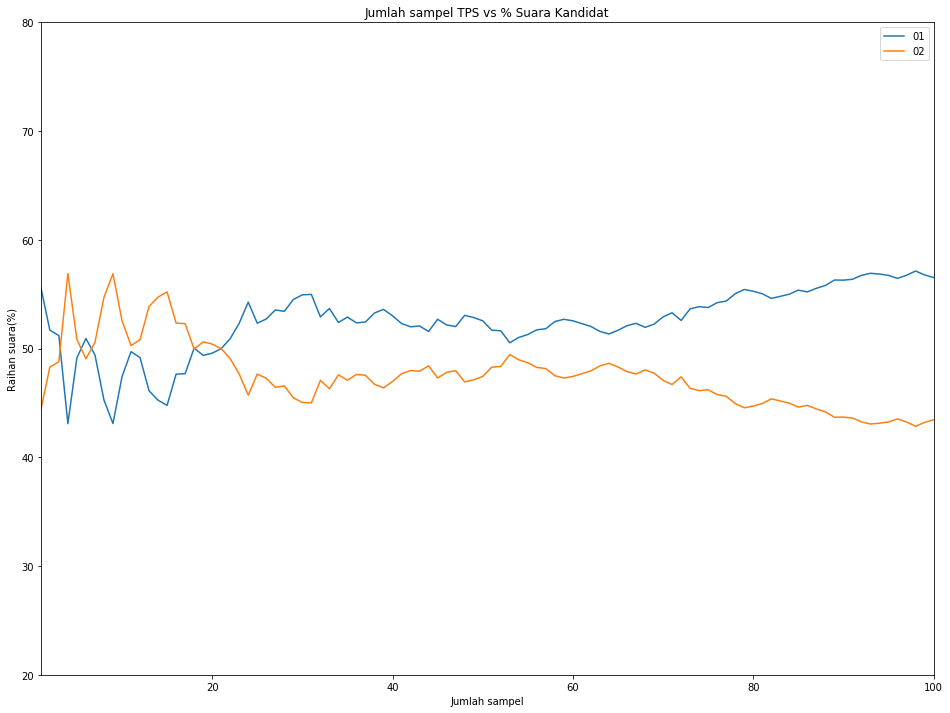

In [4]:
# plot data sample size vs pct of vote for each candidate
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

scnt = range(1,len(samples)+1)
pct01 = []
pct02 = []
pctts = []
v01=0
v02=0
for s in samples:
    v01 += s[1]
    v02 += s[2]
    tot = v01 + v02
    pct01.append(round(v01/tot * 100,2))
    pct02.append(round(v02/tot * 100,2))

plt.rcParams["figure.figsize"]=16,12    

fig, ax = plt.subplots()
plt.title('Jumlah sampel TPS vs % Suara Kandidat')
plt.ylabel('Raihan suara(%)')
plt.xlabel('Jumlah sampel')

ax.axis([1, len(samples), 20, 80])
ax.plot(scnt,pct01,label='01')
ax.plot(scnt,pct02,label='02')

ax.legend()

fig.savefig('sample1000.png')
    

In [5]:
len(samples)

100